# Detecting and Combating Misinformation on Social Media

Social Media has opened a whole new world for people around the globe.People are just a click away from getting huge chunk of information. With information comes people’s opinion and with this comes the positive and negative outlook of people regarding a topic. Sometimes this also results into bullying and passing on hate comments about someone or something.

This "Misinformation" might include hoaxes, conspiracy theories, etc. and can be used to misguide the reader. To combat such nuisance caused by misinformation we must know how to use social media in a critical way and understand the mechanisms of these platforms as nowadays social media presence is also an important tool for Businesses and individuals as well.
The model designed can easily classify true and fake news by using twitter dataset for training.

## Importing necessary libraries

In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


## Load Data

### Clean and preprocess the 2 datasets and combining them

In [3]:
true_df = pd.read_csv('~/Code/mini_project/True.csv')
true_df['Class'] = True

fake_df = pd.read_csv('~/Code/mini_project/Fake.csv')
fake_df['Class'] = False

In [4]:
true_df.head()

,title,text,subject,date,Class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [5]:
fake_df.head()

,title,text,subject,date,Class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",False
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",False
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",False
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",False
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",False


In [6]:
df_final = pd.concat([true_df, fake_df])
df_final.head()

,title,text,subject,date,Class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


### Preprocessing and splitting data set into training and test using `train_test_split`

In [7]:
train_set, test_set, train_label, test_label = train_test_split(df_final['text'], df_final['Class'], random_state =10, test_size = 0.20)
print(f'Train feature set: {train_set.shape}')

Train feature set: (35918,)


In [8]:
# Now building a pipeline for raw text transformation
clf = Pipeline([
    ('vect', TfidfVectorizer(stop_words="english")),
    ('classifier', MultinomialNB()),
])

In [9]:
model_NB = clf.fit(train_set, train_label)

In [10]:
score = model_NB.score(test_set, test_label)
print(f'Accuracy of model: {score}')

Accuracy of model: 0.9384187082405345


### Validating the scores
- Using confusion matrix


In [11]:
# Confusion matrix
y_predicted_labels = model_NB.predict(test_set)
cnf_matrix = confusion_matrix(test_label, y_predicted_labels)
np.set_printoptions(precision=2)
cnf_matrix

array([[4455,  259],
       [ 294, 3972]])

In [12]:
import itertools

def plot_confusion_matrix(cm, classes, 
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
        This function is used to print and plot the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion matrix')
    else:
        print('Confusion Matrix without normalization')
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion Matrix without normalization
[[4455  259]
 [ 294 3972]]
Normalized Confusion matrix
[[0.95 0.05]
 [0.07 0.93]]


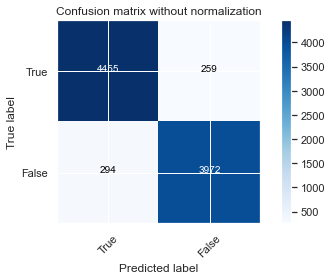

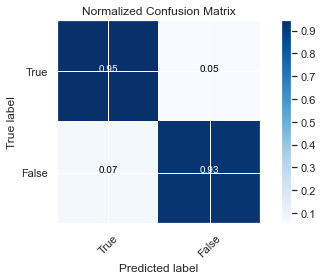

In [13]:
# Without Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['True', 'False'],
                     title='Confusion matrix without normalization')

# With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['True', 'False'],
                     normalize=True, title='Normalized Confusion Matrix')

plt.show()

## Predicting fake news using Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
# Building pipeline for text transformation
clf = Pipeline([
    ('vect', TfidfVectorizer(stop_words="english")),
    ('classifier', LogisticRegression()),
])

In [16]:
model_LogReg = clf.fit(train_set, train_label)

In [17]:
score = model_LogReg.score(test_set, test_label)
print(f'Accuracy of model is: {score}')

Accuracy of model is: 0.989086859688196


In [18]:
# Confusion Matrix
y_predicted_labels = model_LogReg.predict(test_set)
cnf_matrix = confusion_matrix(test_label, y_predicted_labels)
np.set_printoptions(precision=2)
cnf_matrix

array([[4655,   59],
       [  39, 4227]])

### Plotting the confusion matrix

Confusion Matrix without normalization
[[4655   59]
 [  39 4227]]
Normalized Confusion matrix
[[0.99 0.01]
 [0.01 0.99]]


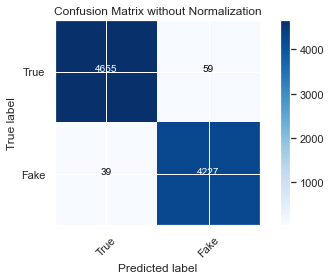

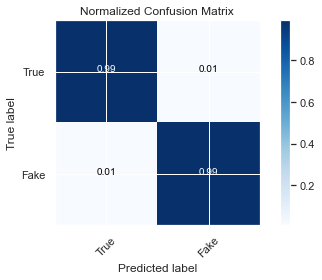

In [19]:
# Without Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['True', 'Fake'],
                     title='Confusion Matrix without Normalization')

# With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['True', 'Fake'],
                     normalize=True, title='Normalized Confusion Matrix')

plt.show()

In [20]:
sample_examples = ['two hundred people flew to Mars from India',
                  'India won the test series against Australia',
                  'World war started in 2020 and thanks to COVID it was stopped',
                 'World conference held in Winter']

In [21]:
for text in sample_examples:
    print(f'Predicted label for `{text}` : {model_LogReg.predict([text])[0]}')

Predicted label for `two hundred people flew to Mars from India` : False
Predicted label for `India won the test series against Australia` : False
Predicted label for `World war started in 2020 and thanks to COVID it was stopped` : False
Predicted label for `World conference held in Winter` : False


### As we can see the model is now capable of predicting the labels for any given news piece and can be helped in checking misinformation.

### Predicting Fake News using RandomForest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
clf = Pipeline([
    ('vect', TfidfVectorizer(stop_words="english")),
    ('classifier', RandomForestClassifier()),
])

In [24]:
model_RFC = clf.fit(train_set, train_label)

In [26]:
score = model_RFC.score(test_set, test_label)
print(f'Accuracy of the model is : {score}')

Accuracy of the model is : 0.9919821826280624


In [27]:
# Confusion Matrix
y_predicted_labels = model_RFC.predict(test_set)
cnf_matrix = confusion_matrix(test_label, y_predicted_labels)
np.set_printoptions(precision=2)
cnf_matrix

array([[4679,   35],
       [  37, 4229]])

### Plotting the Confusion Matrix

Confusion Matrix without normalization
[[4679   35]
 [  37 4229]]
Normalized Confusion matrix
[[0.99 0.01]
 [0.01 0.99]]


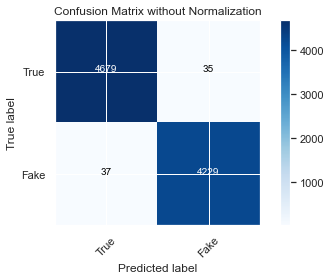

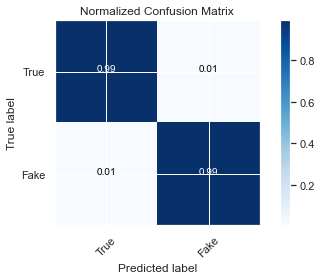

In [28]:
# Without Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['True', 'Fake'],
                     title='Confusion Matrix without Normalization')

# With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['True', 'Fake'],
                     normalize=True, title='Normalized Confusion Matrix')

plt.show()

In [29]:
### Now predicting for some random examples:
for text in sample_examples:
    print(f'Predicted label for `{text}` : {model_RFC.predict([text])[0]}')

Predicted label for `two hundred people flew to Mars from India` : False
Predicted label for `India won the test series against Australia` : False
Predicted label for `World war started in 2020 and thanks to COVID it was stopped` : False
Predicted label for `World conference held in Winter` : False
